# Customer Segmentation using RFM Analysis

---

created by : Hanindhiya Ika Septiana

**Contents**
- Data Understanding
- Data Pre Processing
- RFM Analysis


In [ ]:
import numpy as np 
import pandas as pd

import time, warnings
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot

warnings.filterwarnings("ignore")

## Data Understanding

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/Hanin-ika0109/custsegment-forecasting/master/ecommerce_transaction.csv')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom


## Data Pre Processing

In [ ]:
retail = df[(df['Country'] == 'United Kingdom') & (df['Quantity'] > 0) & (df['UnitPrice'] > 0)]
retail.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541889,581585,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12.0,12/9/2011 12:31,1.95,15804.0,United Kingdom
541890,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8.0,12/9/2011 12:49,2.95,13113.0,United Kingdom
541891,581586,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24.0,12/9/2011 12:49,1.25,13113.0,United Kingdom
541892,581586,21217,RED RETROSPOT ROUND CAKE TINS,24.0,12/9/2011 12:49,8.95,13113.0,United Kingdom
541893,581586,20685,DOORMAT RED RETROSPOT,10.0,12/9/2011 12:49,7.08,13113.0,United Kingdom


In [ ]:
retail.isnull().sum()

InvoiceNo           0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     128436
Country             0
dtype: int64

In [ ]:
retail.dropna(subset=['CustomerID'],how='all',inplace=True)
retail.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [ ]:
retail.drop_duplicates(inplace=True)
retail.duplicated().sum()

0

In [ ]:
retail.shape

(345933, 8)

In [ ]:
# converting from float to int
retail['Quantity'] = retail['Quantity'].apply(np.int64)
retail['CustomerID'] = retail['CustomerID'].apply(np.int64)

retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850,United Kingdom


In [ ]:
retail['Total'] = retail['Quantity'] * retail['UnitPrice']
retail['Date'] = pd.DatetimeIndex(retail['InvoiceDate']).date

retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total,Date
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,United Kingdom,15.30,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom,20.34,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom,22.00,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850,United Kingdom,20.34,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850,United Kingdom,20.34,2010-12-01


## RFM Analysis

### Recency (R)

How many days, weeks, months have passed since their last purchase?

In [ ]:
# Last Invoice Date
retail['InvoiceDate'].max()

'9/9/2011 9:52'

In [ ]:
now = dt.date(2012,1,1)
print(now)

2012-01-01


In [ ]:
recency = retail.groupby(by='CustomerID', as_index=False)['Date'].max()
recency.columns = ['CustomerID','LastPurchaseDate']
recency.head()

,CustomerID,LastPurchaseDate
0,12346,2011-01-18
1,12747,2011-12-07
2,12748,2011-12-09
3,12749,2011-12-06
4,12820,2011-12-06


In [ ]:
# Calculate Recency
recency['Recency'] = recency['LastPurchaseDate'].apply(lambda x: (now - x).days)
recency.head()

,CustomerID,LastPurchaseDate,Recency
0,12346,2011-01-18,348
1,12747,2011-12-07,25
2,12748,2011-12-09,23
3,12749,2011-12-06,26
4,12820,2011-12-06,26


In [ ]:
recency.drop('LastPurchaseDate',axis=1,inplace=True)
recency.head()

,CustomerID,Recency
0,12346,348
1,12747,25
2,12748,23
3,12749,26
4,12820,26


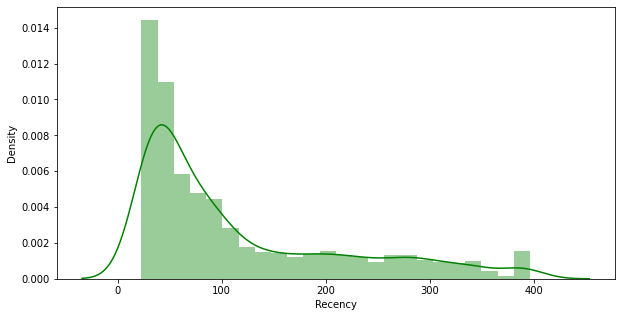

In [ ]:
#Recency Distribution Plot
plt.figure(figsize=(10,5))
sns.distplot(recency['Recency'], color='g')
plt.ylabel('Density')
plt.show()

### Frequency (F)
How many times has a customer bought from you? 

In [ ]:
#Calculate Frequency of Purchases
frequency = retail.groupby(by=['CustomerID'], as_index=False)['InvoiceNo'].count()
frequency.columns = ['CustomerID','Frequency']
frequency.head()

,CustomerID,Frequency
0,12346,1
1,12747,103
2,12748,4372
3,12749,197
4,12820,59


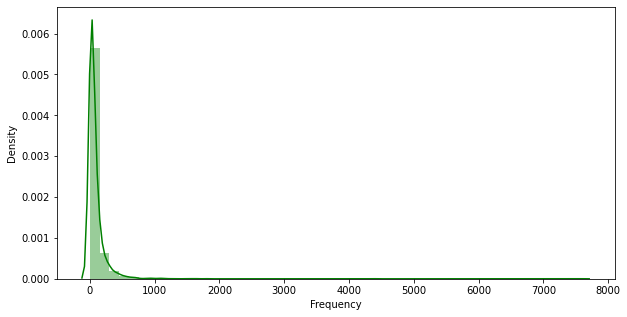

In [ ]:
#Frequency Distribution Plot
plt.figure(figsize=(10,5))
sns.distplot(frequency['Frequency'], color='g')
plt.ylabel('Density')
plt.show()

### Monetary (M)
How much money did the customer spend? 

In [ ]:
monetary = retail.groupby(by='CustomerID',as_index=False).agg({'Total': 'sum'})
monetary.columns = ['CustomerID','Monetary']
monetary.head()

,CustomerID,Monetary
0,12346,77183.60
1,12747,4196.01
2,12748,32691.09
3,12749,4045.58
4,12820,942.34


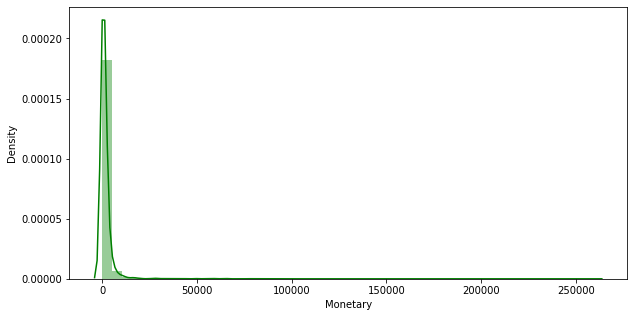

In [ ]:
#Frequency Distribution Plot
plt.figure(figsize=(10,5))
sns.distplot(monetary['Monetary'], color='g')
plt.ylabel('Density')
plt.show()

### Define Customer Segmentation 

In [ ]:
#Merge Recency and Frequency Table
rf = recency.merge(frequency,on='CustomerID')

In [ ]:
#Merge Recency and Frequency and Monetary Table
rfm = rf.merge(monetary,on='CustomerID')
rfm.set_index('CustomerID',inplace=True)

rfm.head(10)

,Recency,Frequency,Monetary
CustomerID,,,
12346,348,1,77183.60
12747,25,103,4196.01
12748,23,4372,32691.09
12749,26,197,4045.58
12820,26,59,942.34
12821,237,6,92.72
12822,93,46,948.88
12823,97,5,1759.50
12824,82,24,392.08


In [ ]:
#Calculating quantile values
quantiles = rfm.quantile(q=[0.25,0.5,0.75])
quantiles

,Recency,Frequency,Monetary
0.25,40.00,16.0,294.4000
0.50,73.00,40.0,641.6950
0.75,165.75,97.0,1559.3425


In [ ]:
#Calculating quantile values
quintiles = rfm[['Recency', 'Frequency', 'Monetary']].quantile([0.25, 0.5, 0.75]).to_dict()

###Benchmark to give score for recency indicator
def r_score(r):
    if r < quintiles['Recency'][0.25]:
        return 4
    elif r < quintiles['Recency'][0.50]:
        return 3
    elif r < quintiles['Recency'][0.75]:
        return 2
    else: 
        return 1

###Benchmark to give score for frequency indicator.   
def f_score(f): 
    if f < quintiles['Frequency'][0.25]:
        return 1
    elif f < quintiles['Frequency'][0.50]:
        return 2
    elif f < quintiles['Frequency'][0.75]:
        return 3
    else: 
        return 4

###Benchmark to give score for monetary indicator.   
def m_score(m): 
    if m < quintiles['Monetary'][0.25]:
        return 1
    elif m < quintiles['Monetary'][0.50]:
        return 2
    elif m < quintiles['Monetary'][0.75]:
        return 3
    else: 
        return 4

In [ ]:
#Define RFM Segmentation Table
rfm['R Score'] = rfm.Recency.apply(lambda x: r_score(x))
rfm['F Score'] = rfm.Frequency.apply(lambda x: f_score(x))
rfm['M Score'] = rfm.Monetary.apply(lambda x: m_score(x))

rfm.head()

,Recency,Frequency,Monetary,R Score,F Score,M Score
CustomerID,,,,,,
12346,348,1,77183.60,1,1,4
12747,25,103,4196.01,4,4,4
12748,23,4372,32691.09,4,4,4
12749,26,197,4045.58,4,4,4
12820,26,59,942.34,4,3,3


In [ ]:
rfm['RFM Score'] = rfm[['R Score','F Score','M Score']].sum(axis=1)

rfm.head()

,Recency,Frequency,Monetary,R Score,F Score,M Score,RFM Score
CustomerID,,,,,,,
12346,348,1,77183.60,1,1,4,6
12747,25,103,4196.01,4,4,4,12
12748,23,4372,32691.09,4,4,4,12
12749,26,197,4045.58,4,4,4,12
12820,26,59,942.34,4,3,3,10


In [ ]:
# Define rfm_level function 
def rfm_level(df):
    if df['RFM Score'] == 12:
        return 'Best Customers'
    elif ((df['RFM Score'] >= 9) and (df['RFM Score'] <= 11)):
        return 'Loyal Customers'
    elif ((df['RFM Score'] >= 6) and (df['RFM Score'] <= 8)):
        return 'Potential Loyalist'
    elif ((df['RFM Score'] >= 4) and (df['RFM Score'] <= 5)):
        return 'Almost Lost'
    elif df['RFM Score'] <= 3:
        return 'Lost Customers'
    
# Create a new variable RFM_Level
rfm['Segmentation'] = rfm.apply(rfm_level, axis=1)

rfm.head(10)

,Recency,Frequency,Monetary,R Score,F Score,M Score,RFM Score,Segmentation
CustomerID,,,,,,,,
12346,348,1,77183.60,1,1,4,6,Potential Loyalist
12747,25,103,4196.01,4,4,4,12,Best Customers
12748,23,4372,32691.09,4,4,4,12,Best Customers
12749,26,197,4045.58,4,4,4,12,Best Customers
12820,26,59,942.34,4,3,3,10,Loyal Customers
12821,237,6,92.72,1,1,1,3,Lost Customers
12822,93,46,948.88,2,3,3,8,Potential Loyalist
12823,97,5,1759.50,2,1,4,7,Potential Loyalist
12824,82,24,392.08,2,2,2,6,Potential Loyalist


In [ ]:
rfm['Segmentation'].value_counts()

Potential Loyalist    1240
Loyal Customers       1115
Almost Lost            847
Best Customers         396
Lost Customers         320
Name: Segmentation, dtype: int64

In [ ]:
rfm[rfm['Segmentation'] =='Potential Loyalist'].sort_values('Monetary', ascending=False)

,Recency,Frequency,Monetary,R Score,F Score,M Score,RFM Score,Segmentation
CustomerID,,,,,,,,
12346,348,1,77183.60,1,1,4,6,Potential Loyalist
15749,258,10,44534.30,1,1,4,6,Potential Loyalist
15098,205,3,39916.50,1,1,4,6,Potential Loyalist
12980,180,16,6980.70,1,2,4,7,Potential Loyalist
13027,136,26,6912.00,2,2,4,8,Potential Loyalist
...,...,...,...,...,...,...,...,...
14865,30,4,52.20,4,1,1,6,Potential Loyalist
18184,38,1,49.80,4,1,1,6,Potential Loyalist
15992,26,3,41.99,4,1,1,6,Potential Loyalist


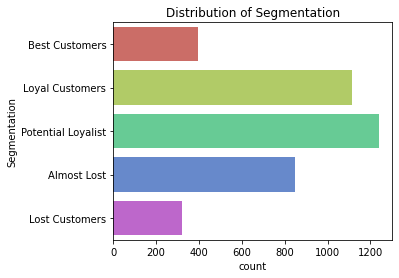

In [ ]:
plt.figure(figsize=(5,4))
rfm_level = ["Best Customers","Loyal Customers","Potential Loyalist","Almost Lost","Lost Customers"]
plt.title('Distribution of Segmentation')
sns.countplot(y='Segmentation', data=rfm, palette='hls', order = rfm_level);

In [ ]:
#from google.colab import drive
#retail.to_excel( "/content/drive/My Drive/data-ecommerce.xlsx", encoding='utf-8-sig')